In [1]:
# All required imports
# Run before using

import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif


In [2]:
# Wczytanie danych
path = "data/LDAP.csv"

dataframe = pd.read_csv(path, low_memory=False)

# Opcjonalnie
# dataframe = pd.read_csv(path)

In [3]:
# Ustawienie wyświetlania wszytskich kolumn i wierszy
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [4]:
# Wyświetlenie pierwszych X wierszy
dataframe.head(3)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,13605,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,1,2,0,422.0,0.0,211.0,211.0,211.0,0.0,0.0,0.0,0.0,0.0,4.220000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,211.0,211.0,211.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,316.5,211.0,0.0,-2,0,0,0,0,0,0,2,422,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,62631,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,48,2,0,530.0,0.0,265.0,265.0,265.0,0.0,0.0,0.0,0.0,0.0,1.104167e+07,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,4.166667e+04,0.0,265.0,265.0,265.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,397.5,265.0,0.0,-2,0,0,0,0,0,0,2,530,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,143869,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,0,0,0,0,0,0,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [5]:
print (sorted(Counter(dataframe[" Label"]).items()))

[('BENIGN', 5124), ('LDAP', 1905191), ('NetBIOS', 202919)]


In [6]:
# Usunięcie pierwszej kolumny 'Unnamed'
dataframe = dataframe.drop(dataframe.columns[0], axis=1)

In [7]:
# Ponowne wyświetlenie pierwszych X wierszy - kolumna 'Unnamed' została usunięta poprawnie
dataframe.head(3)

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,1,2,0,422.0,0.0,211.0,211.0,211.0,0.0,0.0,0.0,0.0,0.0,4.220000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,211.0,211.0,211.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,316.5,211.0,0.0,-2,0,0,0,0,0,0,2,422,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,48,2,0,530.0,0.0,265.0,265.0,265.0,0.0,0.0,0.0,0.0,0.0,1.104167e+07,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,4.166667e+04,0.0,265.0,265.0,265.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,397.5,265.0,0.0,-2,0,0,0,0,0,0,2,530,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,0,0,0,0,0,0,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [8]:
# Wybieranie cech
selected_columns = [' Source Port', ' Destination Port', ' Protocol', ' Fwd Packet Length Max', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', 'Fwd Packets/s', ' Bwd Packets/s',' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' Average Packet Size']

# wykorzystanie tylko wcześniej wybranych cech
X = dataframe[selected_columns]

In [9]:
X.head(5)

,Source Port,Destination Port,Protocol,Fwd Packet Length Max,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Fwd Packets/s,Bwd Packets/s,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,Average Packet Size
0,870,2908,17,211.0,4.220000e+08,2.000000e+06,1.0,2.000000e+06,0.0,0,0,0,0,316.5
1,871,53796,17,265.0,1.104167e+07,4.166667e+04,48.0,4.166667e+04,0.0,0,0,0,0,397.5
2,648,40660,17,229.0,4.580000e+08,2.000000e+06,1.0,2.000000e+06,0.0,0,0,0,0,343.5
3,872,54308,17,229.0,4.580000e+08,2.000000e+06,1.0,2.000000e+06,0.0,0,0,0,0,343.5
4,873,40653,17,229.0,4.580000e+08,2.000000e+06,1.0,2.000000e+06,0.0,0,0,0,0,343.5


In [10]:
# Sprawdź, czy są brakujące wartości
print(X.isna().sum())  # Liczba brakujących wartości w każdej kolumnie


 Source Port               0
 Destination Port          0
 Protocol                  0
 Fwd Packet Length Max     0
Flow Bytes/s              13
 Flow Packets/s            0
 Flow IAT Mean             0
Fwd Packets/s              0
 Bwd Packets/s             0
 SYN Flag Count            0
 RST Flag Count            0
 PSH Flag Count            0
 ACK Flag Count            0
 Average Packet Size       0
dtype: int64


In [11]:
X = X.fillna(X.mean())  # Wypełnianie brakujących wartości średnią

In [12]:
# Sprawdź, czy są brakujące wartości
print(X.isna().sum())  # Liczba brakujących wartości w każdej kolumnie

 Source Port              0
 Destination Port         0
 Protocol                 0
 Fwd Packet Length Max    0
Flow Bytes/s              0
 Flow Packets/s           0
 Flow IAT Mean            0
Fwd Packets/s             0
 Bwd Packets/s            0
 SYN Flag Count           0
 RST Flag Count           0
 PSH Flag Count           0
 ACK Flag Count           0
 Average Packet Size      0
dtype: int64


In [13]:
# Sprawdzenie obecności wartości inf i -inf w danych
print(np.isinf(X).sum())  # Liczba wartości inf w każdej kolumnie

 Source Port                  0
 Destination Port             0
 Protocol                     0
 Fwd Packet Length Max        0
Flow Bytes/s              54112
 Flow Packets/s           54112
 Flow IAT Mean                0
Fwd Packets/s                 0
 Bwd Packets/s                0
 SYN Flag Count               0
 RST Flag Count               0
 PSH Flag Count               0
 ACK Flag Count               0
 Average Packet Size          0
dtype: int64


In [14]:
# Zastąpienie wartości inf lub -inf np. średnią danej kolumny
X = X.replace([np.inf, -np.inf], np.nan)  # Zamiana inf na NaN
X = X.fillna(X.mean())  # Wypełnianie NaN średnią

In [15]:
# Sprawdzenie obecności wartości inf i -inf w danych
print(np.isinf(X).sum())  # Liczba wartości inf w każdej kolumnie

 Source Port              0
 Destination Port         0
 Protocol                 0
 Fwd Packet Length Max    0
Flow Bytes/s              0
 Flow Packets/s           0
 Flow IAT Mean            0
Fwd Packets/s             0
 Bwd Packets/s            0
 SYN Flag Count           0
 RST Flag Count           0
 PSH Flag Count           0
 ACK Flag Count           0
 Average Packet Size      0
dtype: int64


In [16]:
# Standaryzacja cech
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Możesz teraz używać X_scaled do treningu modelu


In [17]:
# Normalizacja cech do zakresu [0, 1]
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Możesz teraz używać X_normalized do treningu modelu

In [18]:
Y = dataframe[' Label']

In [19]:
# Wyświetlanie pierwszych 5 wierszy z numpy.ndarray
print(X_scaled[:5])

[[-0.0146512  -1.57497699  0.04506585 -3.0367709  -2.17308252  0.44386598
  -0.01169673  0.4667489  -0.00471523 -0.00528394 -0.02115141  0.
  -0.02150671 -3.03298557]
 [-0.01427152  1.10965851  0.04506585 -2.8917373  -2.6196588  -3.43409593
  -0.01092675 -2.92315677 -0.00471523 -0.00528394 -0.02115141  0.
  -0.02150671 -2.88806194]
 [-0.09894052  0.41665875  0.04506585 -2.98842636 -2.13396238  0.44386598
  -0.01169673  0.4667489  -0.00471523 -0.00528394 -0.02115141  0.
  -0.02150671 -2.98467769]
 [-0.01389184  1.13666947  0.04506585 -2.98842636 -2.13396238  0.44386598
  -0.01169673  0.4667489  -0.00471523 -0.00528394 -0.02115141  0.
  -0.02150671 -2.98467769]
 [-0.01351215  0.41628946  0.04506585 -2.98842636 -2.13396238  0.44386598
  -0.01169673  0.4667489  -0.00471523 -0.00528394 -0.02115141  0.
  -0.02150671 -2.98467769]]


In [20]:
# Wyświetlanie pierwszych 5 wierszy z numpy.ndarray
print(X_normalized[:5])

[[1.32757542e-02 4.43732357e-02 1.00000000e+00 5.94533671e-02
  1.43342391e-01 6.66666661e-01 2.71267494e-08 6.66666667e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.43342391e-01]
 [1.32910137e-02 8.20874342e-01 1.00000000e+00 7.46689208e-02
  3.75056612e-03 1.38888716e-02 1.30208397e-06 1.38888889e-02
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.80027174e-01]
 [9.88814796e-03 6.20431830e-01 1.00000000e+00 6.45252184e-02
  1.55570652e-01 6.66666661e-01 2.71267494e-08 6.66666667e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.55570652e-01]
 [1.33062732e-02 8.28686961e-01 1.00000000e+00 6.45252184e-02
  1.55570652e-01 6.66666661e-01 2.71267494e-08 6.66666667e-01
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.55570652e-01]
 [1.33215327e-02 6.20325017e-01 1.00000000e+00 6.45252184e-02
  1.55570652e-01 6.66666661e-01 2.71267494e-08 6.66666667e-01


In [21]:
Y.head(5)

0    NetBIOS
1    NetBIOS
2    NetBIOS
3    NetBIOS
4    NetBIOS
Name:  Label, dtype: object

In [22]:
# Podział na dane treningowe i testowe
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


In [23]:
# Tworzenie modelu Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Trenowanie modelu na danych treningowych
model.fit(X_train, Y_train)

# Zapisanie modelu do pliku
joblib.dump(model, 'unbalanced_model.pkl')

# Predykcja na danych testowych
Y_pred = model.predict(X_test)

# Ocena dokładności modelu
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Wyświetlanie raportu klasyfikacji
print(classification_report(Y_test, Y_pred))

Accuracy: 0.9999550452268678
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00      1026
        LDAP       1.00      1.00      1.00    381151
     NetBIOS       1.00      1.00      1.00     40470

    accuracy                           1.00    422647
   macro avg       1.00      1.00      1.00    422647
weighted avg       1.00      1.00      1.00    422647



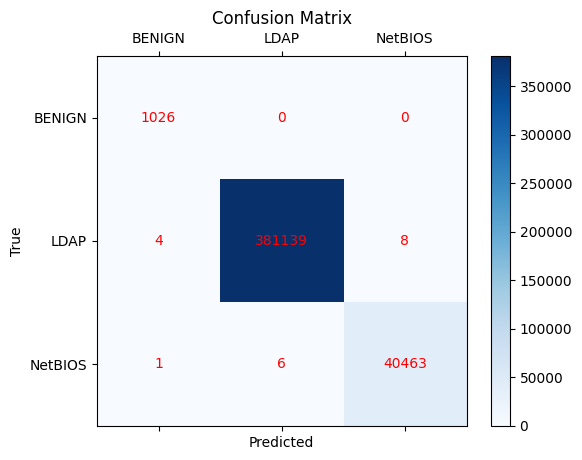

In [24]:
# Obliczenie macierzy pomyłek
cm = confusion_matrix(Y_test, Y_pred)

# Wykres macierzy pomyłek
fig, ax = plt.subplots()
cax = ax.matshow(cm, cmap='Blues')
fig.colorbar(cax)

# Etykiety osi
ax.set_xticks(np.arange(len(model.classes_)))
ax.set_yticks(np.arange(len(model.classes_)))

# Etykiety osi
ax.set_xticklabels(model.classes_)
ax.set_yticklabels(model.classes_)

# Etykiety osi
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Dodanie wartości liczbowych w komórkach
for (i, j), val in np.ndenumerate(cm):
    ax.text(j, i, val, ha='center', va='center', color='red')

plt.show()


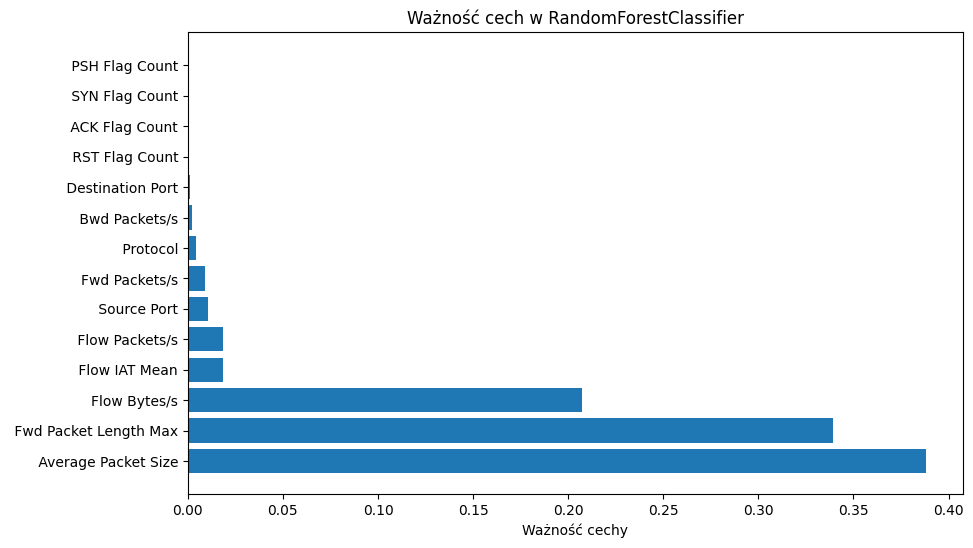

                   Feature  Importance
13     Average Packet Size    0.388120
3    Fwd Packet Length Max    0.339472
4             Flow Bytes/s    0.207490
6            Flow IAT Mean    0.018494
5           Flow Packets/s    0.018460
0              Source Port    0.010369
7            Fwd Packets/s    0.009182
2                 Protocol    0.004504
8            Bwd Packets/s    0.002080
1         Destination Port    0.001204
10          RST Flag Count    0.000363
12          ACK Flag Count    0.000181
9           SYN Flag Count    0.000081
11          PSH Flag Count    0.000000


In [25]:
importances = model.feature_importances_
#Tworzenie DataFrame dla lepszej wizualizacji
features = X.columns  # Jeśli X_train to DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

#Sortowanie cech według ważności
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Wyświetlanie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Ważność cechy')
plt.title('Ważność cech w RandomForestClassifier')
plt.show()

#Wyświetlenie tabeli z ważnością cech
print(importance_df)